In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample Claims Triangle (in Millions)
claims_triangle = pd.DataFrame({
    "Dev_1": [100, 120, 150, 180, 200],
    "Dev_2": [80, 100, 130, 160, np.nan],
    "Dev_3": [60, 90, 110, np.nan, np.nan],
    "Dev_4": [40, 70, np.nan, np.nan, np.nan],
    "Dev_5": [20, np.nan, np.nan, np.nan, np.nan]
}, index=["2015", "2016", "2017", "2018", "2019"])

claims_triangle

,Dev_1,Dev_2,Dev_3,Dev_4,Dev_5
2015,100,80.0,60.0,40.0,20.0
2016,120,100.0,90.0,70.0,NaN
2017,150,130.0,110.0,NaN,NaN
2018,180,160.0,NaN,NaN,NaN
2019,200,NaN,NaN,NaN,NaN


In [22]:
# 1. Calculate Development Factors
def calculate_factors(triangle):
    factors = []
    for col in range(triangle.shape[1] - 1):
        known_data = triangle.iloc[:, col:col + 2].dropna()
        factor = known_data.iloc[:, 1].sum() / known_data.iloc[:, 0].sum()
        factors.append(factor)
    return factors

development_factors = calculate_factors(claims_triangle)
print("Development Factors:", development_factors)
development_factors

Development Factors: [np.float64(0.8545454545454545), np.float64(0.8387096774193549), np.float64(0.7333333333333333), np.float64(0.5)]


[np.float64(0.8545454545454545),
 np.float64(0.8387096774193549),
 np.float64(0.7333333333333333),
 np.float64(0.5)]

In [23]:
# 2. Project Missing Values
def project_claims(triangle, factors):
    projected_triangle = triangle.copy()
    for i in range(len(factors)):
        col = projected_triangle.columns[i]
        next_col = projected_triangle.columns[i + 1]
        for j in range(len(projected_triangle)):
            if pd.isna(projected_triangle[next_col][j]):
                projected_triangle[next_col][j] = round(projected_triangle[col][j] * factors[i], 2)
    return projected_triangle

projected_triangle = project_claims(claims_triangle, development_factors)
print("Projected Claims Triangle:\n", projected_triangle)
projected_triangle

Projected Claims Triangle:
       Dev_1   Dev_2   Dev_3   Dev_4  Dev_5
2015    100   80.00   60.00   40.00  20.00
2016    120  100.00   90.00   70.00  35.00
2017    150  130.00  110.00   80.67  40.34
2018    180  160.00  134.19   98.41  49.20
2019    200  170.91  143.34  105.12  52.56


C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\2291227786.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(projected_triangle[next_col][j]):
C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\2291227786.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  projected_triangle[next_col][j] = round(projected_triangle[col][j] * factors[i], 2)
C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\2291227786.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which 

,Dev_1,Dev_2,Dev_3,Dev_4,Dev_5
2015,100,80.00,60.00,40.00,20.00
2016,120,100.00,90.00,70.00,35.00
2017,150,130.00,110.00,80.67,40.34
2018,180,160.00,134.19,98.41,49.20
2019,200,170.91,143.34,105.12,52.56


In [25]:
# 3. Adjust for Inflation
def adjust_for_inflation(triangle, inflation_rate):
    inflation_factors = [(1 + inflation_rate) ** i for i in range(triangle.shape[1])]
    adjusted_triangle = triangle.copy()
    for i, factor in enumerate(inflation_factors):
        adjusted_triangle.iloc[:, i] *= factor
    return adjusted_triangle

inflation_rate = 0.02  # 2% annual inflation
adjusted_triangle = round(adjust_for_inflation(projected_triangle, inflation_rate), 2)
print("Inflation-Adjusted Claims Triangle:\n", adjusted_triangle)
adjusted_triangle

Inflation-Adjusted Claims Triangle:
       Dev_1   Dev_2   Dev_3   Dev_4  Dev_5
2015  100.0   81.60   62.42   42.45  21.65
2016  120.0  102.00   93.64   74.28  37.89
2017  150.0  132.60  114.44   85.61  43.67
2018  180.0  163.20  139.61  104.43  53.26
2019  200.0  174.33  149.13  111.55  56.89


C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\3977965210.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2015    100.0
2016    120.0
2017    150.0
2018    180.0
2019    200.0
Name: Dev_1, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adjusted_triangle.iloc[:, i] *= factor


,Dev_1,Dev_2,Dev_3,Dev_4,Dev_5
2015,100.0,81.60,62.42,42.45,21.65
2016,120.0,102.00,93.64,74.28,37.89
2017,150.0,132.60,114.44,85.61,43.67
2018,180.0,163.20,139.61,104.43,53.26
2019,200.0,174.33,149.13,111.55,56.89


In [11]:
# 4. Visualize Results
def plot_triangle(triangle, title):
    plt.figure(figsize=(10, 6))
    for i in range(triangle.shape[0]):
        plt.plot(range(1, triangle.shape[1] + 1), triangle.iloc[i, :], marker='o', label=f"Accident Year {triangle.index[i]}")
    plt.title(title)
    plt.xlabel("Development Year")
    plt.ylabel("Claims")
    plt.legend()
    plt.show()

#plot_triangle(projected_triangle, "Projected Claims Triangle")
#plot_triangle(adjusted_triangle, "Inflation-Adjusted Claims Triangle")

In [26]:
# 5. Calculate Reserves
def calculate_reserves(triangle, original_triangle):
    reserves = 0
    for i in range(triangle.shape[0]):  # Iterate over rows
        for j in range(triangle.shape[1]):  # Iterate over columns
            if pd.isna(original_triangle.iloc[i, j]):  # Check if it's a projected value
                reserves += triangle.iloc[i, j]
    return reserves

reserves = calculate_reserves(adjusted_triangle, claims_triangle)
print(f"Total Reserves (in Millions): {reserves:.2f}")

reserves

Total Reserves (in Millions): 956.37


np.float64(956.37)

In [32]:
# 6. Visualize Results
def plot_triangle(triangle, title):
    plt.figure(figsize=(10, 6))
    for i in range(triangle.shape[0]):
        plt.plot(range(1, triangle.shape[1] + 1), triangle.iloc[i, :], marker='o', label=f"Accident Year {triangle.index[i]}")
    plt.title(title)
    plt.xlabel("Development Year")
    plt.ylabel("Claims")
    plt.legend()
    plt.show()

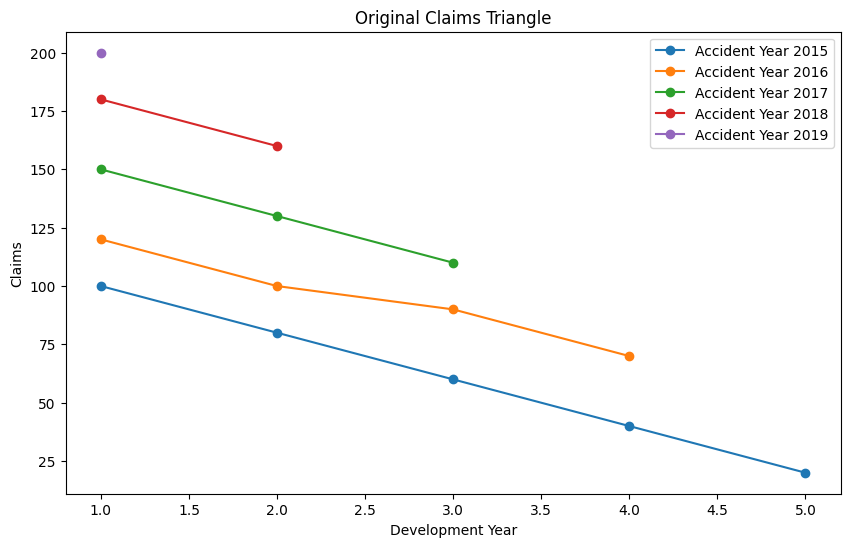

In [33]:
plot_triangle(claims_triangle, "Original Claims Triangle")

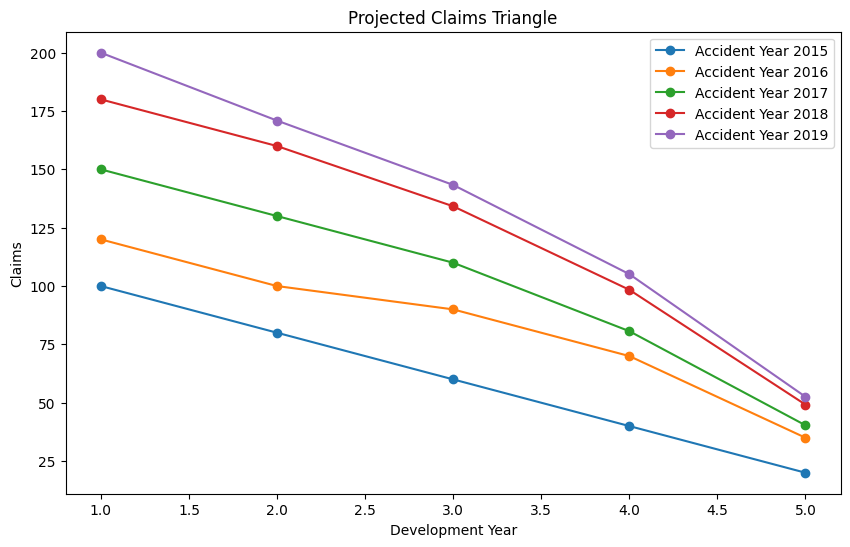

In [36]:
plot_triangle(projected_triangle, "Projected Claims Triangle")

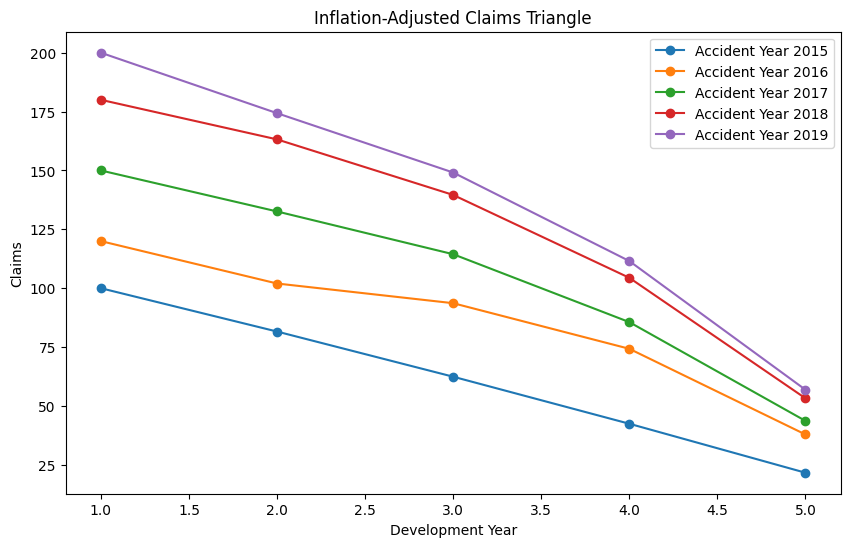

In [38]:
plot_triangle(adjusted_triangle, "Inflation-Adjusted Claims Triangle")

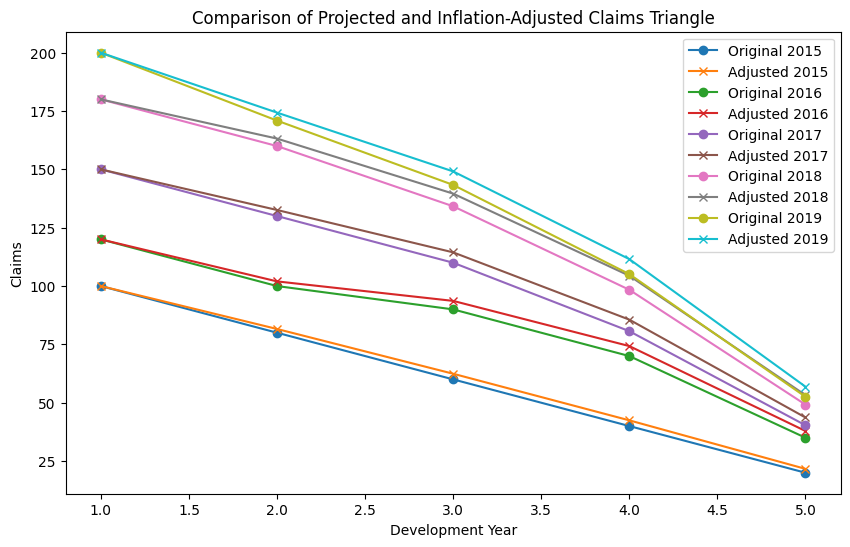

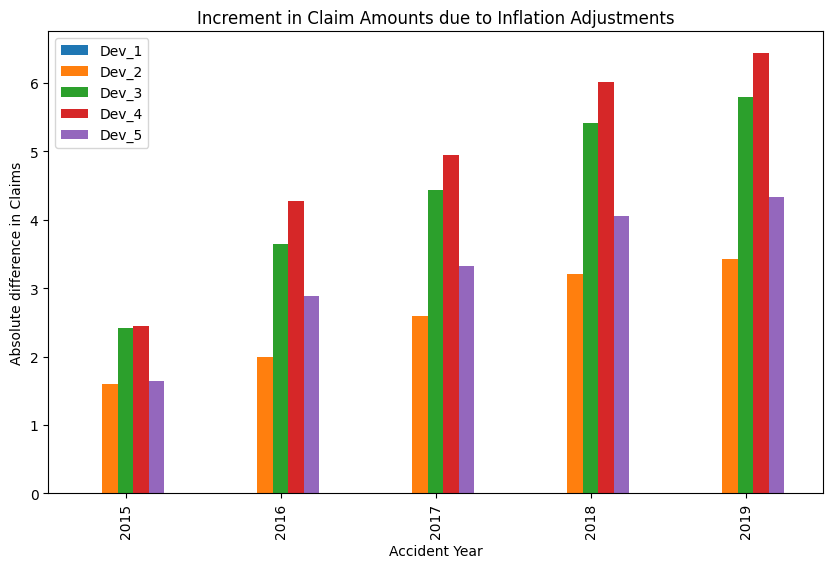

In [44]:
# Plot both triangles on the same graph
def compare_triangles(original, adjusted, title):
    plt.figure(figsize=(10, 6))
    for i in range(original.shape[0]):
        plt.plot(range(1, original.shape[1] + 1), original.iloc[i, :], marker='o', label=f"Original {original.index[i]}")
        plt.plot(range(1, adjusted.shape[1] + 1), adjusted.iloc[i, :], marker='x', label=f"Adjusted {adjusted.index[i]}")
    plt.title(title)
    plt.xlabel("Development Year")
    plt.ylabel("Claims")
    plt.legend()
    plt.show()

compare_triangles(projected_triangle, adjusted_triangle, "Comparison of Projected and Inflation-Adjusted Claims Triangle")

# Plot the difference
def plot_differences(original, adjusted, title):
    difference = adjusted - original
    difference.plot(kind="bar", figsize=(10, 6), title=title)
    plt.xlabel("Accident Year")
    plt.ylabel("Absolute difference in Claims")
    plt.show()

plot_differences(projected_triangle, adjusted_triangle, "Increment in Claim Amounts due to Inflation Adjustments")


In [54]:
# Varying development factors by small percentages (e.g., ±1%, ±2%, ±5%)
sensitivity_results = []
changes = [-0.05, -0.02, -0.01, 0, 0.01, 0.02, 0.05]  # Percent changes
for change in changes:
    # Adjust factors by the given percentage
    adjusted_factors = [factor * (1 + change) for factor in development_factors]
    # Project claims and calculate reserves
    adj_projected_triangle = project_claims(claims_triangle, adjusted_factors)
    adj_adjusted_triangle = adjust_for_inflation(adj_projected_triangle, inflation_rate=0.02)
    adj_reserves = calculate_reserves(adj_adjusted_triangle, claims_triangle)
    sensitivity_results.append({
        "Percentage Change in Factors": f"{change * 100:+.1f}%",
        "Adjusted Reserves (in Millions)": f"{adj_reserves:.2f}"
    })

# Display Results in a DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results)

print("\nSensitivity Analysis Results:")
print(sensitivity_df)


Sensitivity Analysis Results:
  Percentage Change in Factors Adjusted Reserves (in Millions)
0                        -5.0%                          871.41
1                        -2.0%                          921.73
2                        -1.0%                          938.93
3                        +0.0%                          956.36
4                        +1.0%                          974.04
5                        +2.0%                          991.93
6                        +5.0%                         1046.90


C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\2291227786.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(projected_triangle[next_col][j]):
C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\2291227786.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  projected_triangle[next_col][j] = round(projected_triangle[col][j] * factors[i], 2)
C:\Users\1998a\AppData\Local\Temp\ipykernel_20780\2291227786.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which 

In [55]:
sensitivity_df

,Percentage Change in Factors,Adjusted Reserves (in Millions)
0,-5.0%,871.41
1,-2.0%,921.73
2,-1.0%,938.93
3,+0.0%,956.36
4,+1.0%,974.04
5,+2.0%,991.93
6,+5.0%,1046.90
